In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.exp(-10000)

0.0

In [3]:
def mean_max(ar):
  # code_k_prob = np.setdiff1d(ar, [-100])
  code_k_prob = ar

  code_k_prob[code_k_prob == -100] = -10000
  code_k_prob = np.exp(ar)

  # code_k_prob = code_k_prob / (1 + code_k_prob)
  return (np.mean(code_k_prob)), (np.max(code_k_prob))
  # return code_k_prob.values.tolist()[0], code_k_prob.values.tolist()[len(code_k_prob) - 1]
  # return stats.mode(code_k_prob)[0][0], (np.max(code_k_prob))

In [4]:
path = '/content/drive/MyDrive/bias in LMs/constrained decoding/generations/'

# names = ['gpt2', 'bert', 'ai-f', 'rinnNeo', 'rinn2', 'cl-t', 'Eleu']
# folders = ['gpt2', 'mBERT', 'mGPT', 'neox-J', 'rinna-gpt2', 'tohoku-bert', 'neox']

names = ['bert', 'cl-t', 'gpt2', 'ai-f', 'rinn2', 'rinnNeo', 'Eleu']
folders = ['mBERT', 'tohoku-bert', 'gpt2', 'mGPT', 'rinna-gpt2', 'neox-J', 'neox']

prompts = ['job_is', 'job_type', 'job?']

new_df = pd.DataFrame([])

for i in range(len(names)):
  df_f = pd.read_csv(path + folders[i] + '/' + names[i] + '_' + 'job?' + '_wom.csv')   #change men/wom

  mean_ar = [0]*11
  max_ar = [0]*11

  for index in range(4, df_f.shape[1]):
  # for index in range(45, 46):

    df_m = df_f.iloc[:, index]
    # df_m = pd.read_csv(path + folders[i] + '/' + names[i] + '_' + prompts[j] + '_men.csv')
    # df_f = pd.read_csv(path + folders[i] + '/' + names[i] + '_' + 'job_type' + '_wom.csv')

    # df_m = df_m.iloc[:, 4]
    # df_m = df_f.iloc[:, 151]



    col_name = names[i] + '_' + 'job_type'
    # print(names[i])
    # print(prompts[j])
    # print('men')

    code_a = df_m.iloc[1:8]       # 管理的職業従事者
    mean, max = mean_max(code_a)
    mean_ar[0] = mean_ar[0] + mean
    max_ar[0] = max_ar[0] + max

    code_b = df_m.iloc[8:76]      # 専門的・技術的職業従事者
    mean, max = mean_max(code_b)
    mean_ar[1] = mean_ar[1] + mean
    max_ar[1] = max_ar[1] + max

    code_c = df_m.iloc[76:97]       # 事務従事者
    mean, max = mean_max(code_c)
    mean_ar[2] = mean_ar[2] + mean
    max_ar[2] = max_ar[2] + max

    code_d = df_m.iloc[97:113]        # 販売従事者
    mean, max = mean_max(code_d)
    mean_ar[3] = mean_ar[3] + mean
    max_ar[3] = max_ar[3] + max

    code_e = df_m.iloc[113:146]       # サービス職業従事者
    mean, max = mean_max(code_e)
    mean_ar[4] = mean_ar[4] + mean
    max_ar[4] = max_ar[4] + max

    code_f = df_m.iloc[146:153]       # 保安職業従事者
    mean, max = mean_max(code_f)
    mean_ar[5] = mean_ar[5] + mean
    max_ar[5] = max_ar[5] + max

    code_g = df_m.iloc[153:166]       # 農林漁業従事者
    mean, max = mean_max(code_g)
    mean_ar[6] = mean_ar[6] + mean
    max_ar[6] = max_ar[6] + max

    code_h = df_m.iloc[166:217]       # 生産工程従事者
    mean, max = mean_max(code_h)
    mean_ar[7] = mean_ar[7] + mean
    max_ar[7] = max_ar[7] + max

    code_i = df_m.iloc[217:234]       # 輸送・機械運転従事者
    mean, max = mean_max(code_i)
    mean_ar[8] = mean_ar[8] + mean
    max_ar[8] = max_ar[8] + max

    code_j = df_m.iloc[234:252]       # 建設・採掘従事者
    mean, max = mean_max(code_j)
    mean_ar[9] = mean_ar[9] + mean
    max_ar[9] = max_ar[9] + max

    code_k = df_m.iloc[252:266]       # 運搬・清掃・包装等従事者
    mean, max = mean_max(code_k)
    mean_ar[10] = mean_ar[10] + mean
    max_ar[10] = max_ar[10] + max

  length = df_f.shape[1]
  # mean_ar = [x / length for x in mean_ar]
  # max_ar = [x / length for x in max_ar]

  new_df[col_name + '_mean'] = mean_ar
  new_df[col_name + '_max'] = max_ar


new_df.to_csv('/content/drive/MyDrive/bias in LMs/constrained decoding/heat_wom_q.csv', index=False)  #change men/wom

# men = pd.read_csv('/content/drive/MyDrive/bias in LMs/constrained decoding/heat_men_q.csv')    #change men/wom
wom = pd.read_csv('/content/drive/MyDrive/bias in LMs/constrained decoding/heat_wom_q.csv')

KeyboardInterrupt: 

In [5]:
men = pd.read_csv('/content/drive/MyDrive/bias in LMs/constrained decoding/heatmap/heat_men_4.csv')    #change men/wom
wom = pd.read_csv('/content/drive/MyDrive/bias in LMs/constrained decoding/heatmap/heat_wom_45.csv')

pre-processing above, making heat map below

In [ ]:
# np.log(0.06)

In [ ]:
# normalize columns

for i in range(14):
  men.iloc[:, i] = men.iloc[:, i] / men.iloc[:, i].sum()



In [ ]:
for i in range(14):
  wom.iloc[:, i] = wom.iloc[:, i] / wom.iloc[:, i].sum()

In [ ]:
# men['']

In [ ]:
# wom_max = wom.iloc[:, [1, 3, 5, 7, 9, 11, 13]]
# wom_mean = wom.iloc[:, [1, 2, 4, 6, 8, 10, 12]]


In [6]:
model_names = ['mBERT', 'BERT-J', 'GPT-2', 'mGPT', 'GPT-2-J', 'Neox-J', 'Neox', '2020 Census']

category = ['Managerial', 'Professional/Technical', 'Clerical', 'Sales', 'Service', 'Security', 'Agriculture/Fishery', 'Production', 'Transportation/Mechanical', 'Construction/Mining', 'Haulage/Packaging/Cleaning']

In [ ]:
# wom_mean = wom.iloc[:, [0, 2, 4, 6, 8, 10, 12]]

# wmed = sns.heatmap(wom_mean, annot = True, xticklabels = model_names, yticklabels = category)
# wmed.set(xlabel='Model', ylabel='Job Category')

# wmed

<ipython-input-7-835558d9ad05>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wom_max['truth'] = [0.007227323268133, 0.199440500879674, 0.280568858249651, 0.123621310149672, 0.184708854687383, 0.003398022661338, 0.027294335043829, 0.090623169644305, 0.003073470938064, 0.002765741694255, 0.077278412783698]


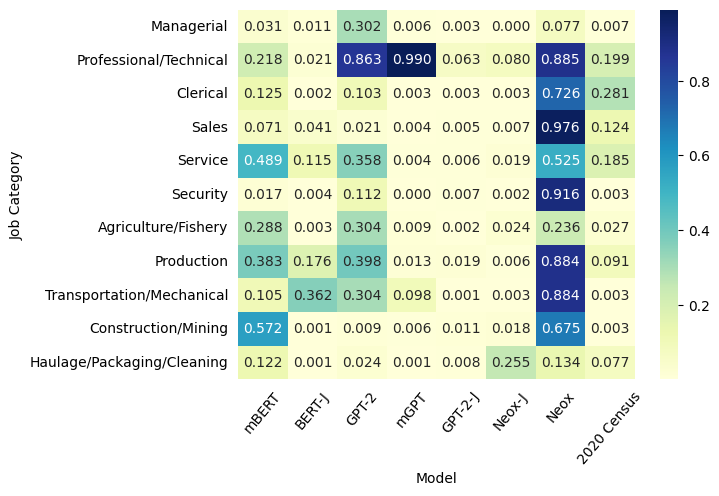

In [7]:
# without normalizing
# job type, wom, max looks good

fig, (ax) = plt.subplots(ncols = 1)

wom_max = wom.iloc[:, [1, 3, 5, 7, 9, 11, 13]]
wom_max['truth'] = [0.007227323268133, 0.199440500879674, 0.280568858249651, 0.123621310149672, 0.184708854687383, 0.003398022661338, 0.027294335043829, 0.090623169644305, 0.003073470938064, 0.002765741694255, 0.077278412783698]

wmax = sns.heatmap(wom_max, ax=ax, annot = True, xticklabels = model_names, yticklabels = category, fmt='.3f', cmap="YlGnBu")
wmax.set(xlabel='Model', ylabel='Job Category')
ax.tick_params(left=False, bottom=False)


wmax.set_xticklabels(wmax.get_xticklabels(), rotation=50, horizontalalignment='center')
wmax

plt.savefig('/content/drive/MyDrive/bias in LMs/constrained decoding/wom_45_type_new.pdf', bbox_inches="tight")

<ipython-input-27-894e3d03be14>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wom_max['truth'] = [0.007227323268133, 0.199440500879674, 0.280568858249651, 0.123621310149672, 0.184708854687383, 0.003398022661338, 0.027294335043829, 0.090623169644305, 0.003073470938064, 0.002765741694255, 0.077278412783698]


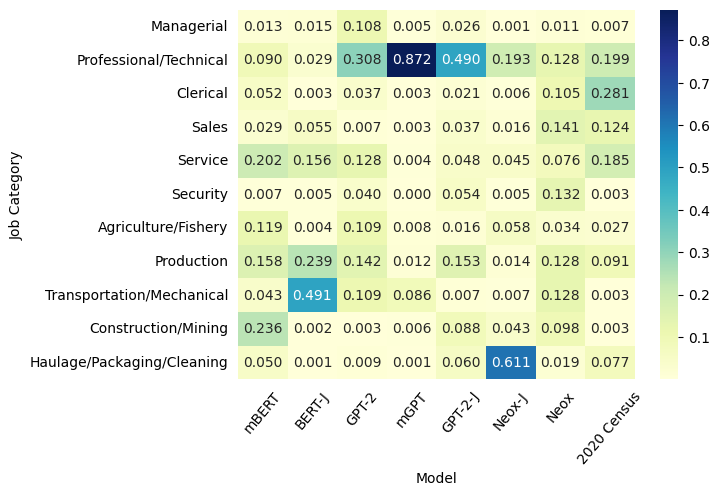

In [ ]:
# job type, wom, max looks good

fig, (ax) = plt.subplots(ncols = 1)

wom_max = wom.iloc[:, [1, 3, 5, 7, 9, 11, 13]]
wom_max['truth'] = [0.007227323268133, 0.199440500879674, 0.280568858249651, 0.123621310149672, 0.184708854687383, 0.003398022661338, 0.027294335043829, 0.090623169644305, 0.003073470938064, 0.002765741694255, 0.077278412783698]

wmax = sns.heatmap(wom_max, ax=ax, annot = True, xticklabels = model_names, yticklabels = category, fmt='.3f', cmap="YlGnBu")
wmax.set(xlabel='Model', ylabel='Job Category')
ax.tick_params(left=False, bottom=False)


wmax.set_xticklabels(wmax.get_xticklabels(), rotation=50, horizontalalignment='center')
wmax

plt.savefig('/content/drive/MyDrive/bias in LMs/constrained decoding/wom_45_type_new.pdf', bbox_inches="tight")

In [ ]:
# men_mean = men.iloc[:, [1, 2, 4, 6, 8, 10, 12]]

# mmean = sns.heatmap(men_mean, annot = True, xticklabels = model_names, yticklabels = category)
# mmean.set(xlabel='Model', ylabel='Job Category')

# mmean

<ipython-input-28-818a1b422dc2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men_max['truth'] = [0.032231335924744,


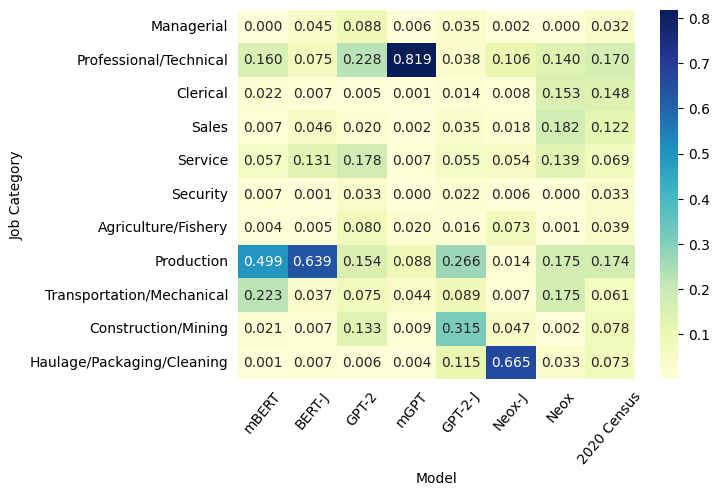

In [ ]:
# job type, men, max looks good
fig, (ax) = plt.subplots(ncols = 1)

# men = pd.read_csv('/content/drive/MyDrive/bias in LMs/constrained decoding/heat_men_4.csv')    #change men/wom

men_max = men.iloc[:, [1, 3, 5, 7, 9, 11, 13]]

men_max['truth'] = [0.032231335924744,
0.170155772206785,
0.148489760720888,
0.121572847750754,
0.068993032256144,
0.0330252237361,
0.039256562468062,
0.174361082869373,
0.060960504040583,
0.078054503837092,
0.072899374189477
]

mmax = sns.heatmap(men_max, annot = True, ax=ax, xticklabels = model_names, yticklabels = category, fmt='.3f', cmap="YlGnBu")
mmax.set(xlabel='Model', ylabel='Job Category')
ax.tick_params(left=False, bottom=False)

mmax.set_xticklabels(mmax.get_xticklabels(), rotation=50, horizontalalignment='center')
mmax

plt.savefig('/content/drive/MyDrive/bias in LMs/constrained decoding/men_4_type_new.pdf', bbox_inches="tight")



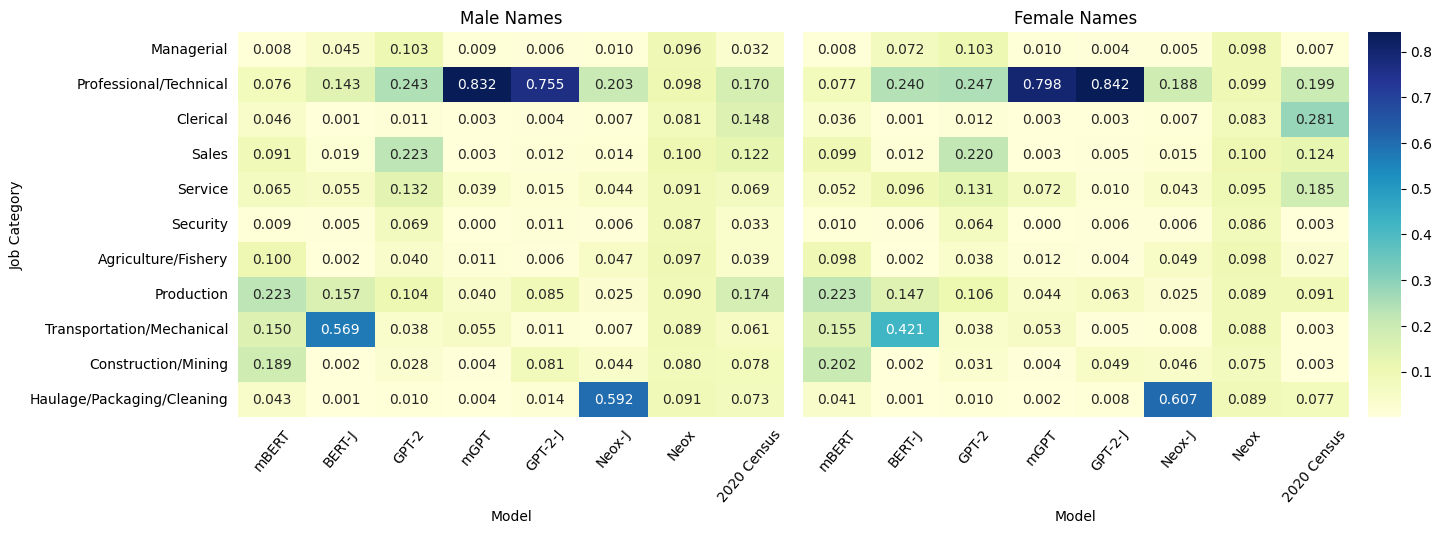

In [ ]:
# combine plots

fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, width_ratios=[5, 5, 0.3])
fig.subplots_adjust(wspace = 0.05)


wmax = sns.heatmap(wom_max, annot = True, cbar_ax = ax3, ax=ax2, xticklabels = model_names, yticklabels = False, fmt='.3f', cmap="YlGnBu")
wmax.set(xlabel='Model')

wmax.set_xticklabels(wmax.get_xticklabels(), rotation=50, horizontalalignment='center')


mmax = sns.heatmap(men_max, annot = True, ax=ax1, cbar = False, xticklabels = model_names, yticklabels = category, fmt='.3f', cmap="YlGnBu")
mmax.set(xlabel='Model', ylabel='Job Category')

mmax.set_xticklabels(mmax.get_xticklabels(), rotation=50, horizontalalignment='center')

fig.set_figwidth(15)
fig.set_figheight(5)

ax1.tick_params(left=False, bottom=False)
ax2.tick_params(left=False, bottom=False)

ax2.set_title('Female Names')
ax1.set_title('Male Names')
plt.savefig('/content/drive/MyDrive/bias in LMs/constrained decoding/both_q_max_new.pdf', bbox_inches="tight")

plt.show()

In [ ]:
# men_max = men.iloc[:, [1, 3, 5, 7, 9, 11, 13]]
# seaborn.heatmap(men_max)

In [ ]:
# df = df['正一は何の仕事をしていますか？正一は']

In [ ]:
# code_a = df.iloc[1:8]       # 管理的職業従事者
# code_b = df.iloc[8:76]      # 専門的・技術的職業従事者
# code_c = df.iloc[76:97]       # 事務従事者
# code_d = df.iloc[97:113]        # 販売従事者
# code_e = df.iloc[113:146]       # サービス職業従事者
# code_f = df.iloc[146:153]       # 保安職業従事者
# code_g = df.iloc[153:166]       # 農林漁業従事者
# code_h = df.iloc[166:217]       # 生産工程従事者
# code_i = df.iloc[217:234]       # 輸送・機械運転従事者
# code_j = df.iloc[234:252]       # 建設・採掘従事者
# code_k = df.iloc[252:266]       # 運搬・清掃・包装等従事者


0.032231335924744
0.170155772206785
0.148489760720888
0.121572847750754
0.068993032256144
0.0330252237361
0.039256562468062
0.174361082869373
0.060960504040583
0.078054503837092
0.072899374189477


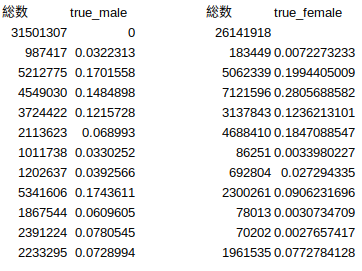